In [39]:
# installing packages
install.packages("caret")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [40]:
# Load required packages
library(dplyr)
library(caret)
library(ggplot2)
library(corrplot)
library(knitr)

In [41]:
auto_mpg <- read.csv(
  "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
  sep = "",
  header = FALSE,
  na.strings = "?"
)

# Assign column names based on the dataset documentation
colnames(auto_mpg) <- c("mpg", "cylinders", "displacement", "horsepower",
                        "weight", "acceleration", "model_year", "origin",
                        "car_name")

In [42]:
# Drop 'car_name' for modeling
auto_mpg <- auto_mpg %>% select(-car_name)

In [43]:
# Convert horsepower to numeric
auto_mpg$horsepower <- as.numeric(auto_mpg$horsepower)

In [44]:
# Remove rows with missing values
auto_mpg <- na.omit(auto_mpg)

In [45]:
# Quick look at the data
head(auto_mpg)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,18,8,307,130,3504,12.0,70,1
2,15,8,350,165,3693,11.5,70,1
3,18,8,318,150,3436,11.0,70,1
4,16,8,304,150,3433,12.0,70,1
5,17,8,302,140,3449,10.5,70,1
6,15,8,429,198,4341,10.0,70,1


In [46]:
# summary of dataset auto-mpg
summary(auto_mpg)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration     model_year        origin     
 Min.   : 8.00   Min.   :70.00   Min.   :1.000  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000  
 Median :15.50   Median :76.00   Median :1.000  
 Mean   :15.54   Mean   :75.98   Mean   :1.577  
 3rd Qu.:17.02   3rd Qu.:79.00   3rd Qu.:2.000  
 Max.   :24.80   Max.   :82.00   Max.   :3.000  

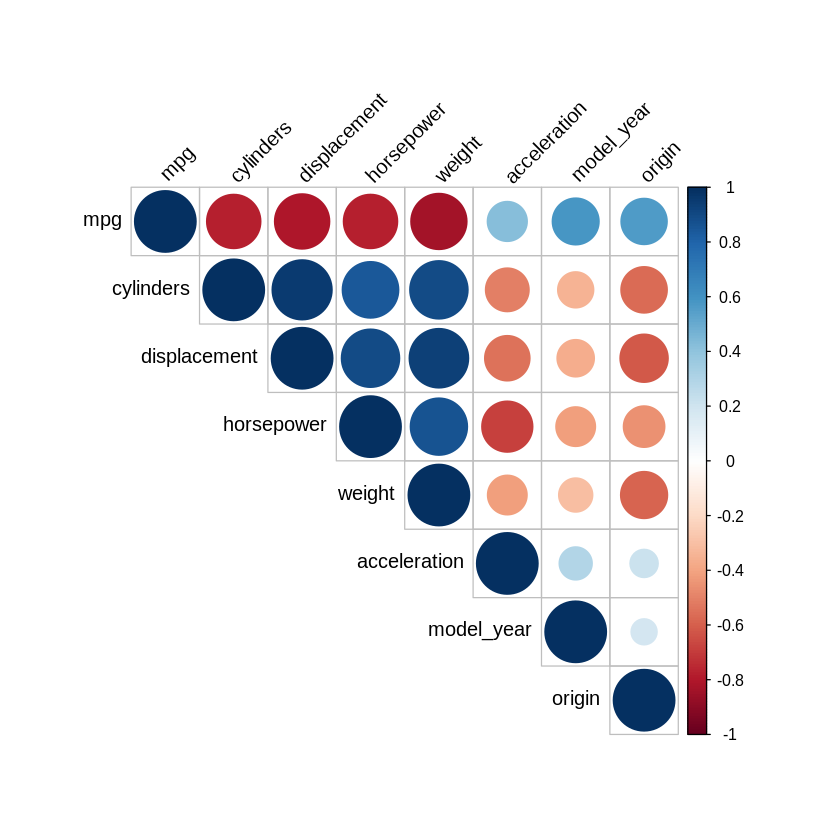

In [47]:
# Check correlations among numeric predictors
cor_data <- cor(auto_mpg[, c("mpg", "cylinders", "displacement",
                             "horsepower", "weight", "acceleration",
                             "model_year", "origin")])

# Plot correlation matrix
corrplot(cor_data, method = "circle", type = "upper", tl.col = "black", tl.srt = 45)

In [48]:
set.seed(999)  # For reproducibility

# Create an 80-20 train-test split
train_index <- createDataPartition(auto_mpg$mpg, p = 0.8, list = FALSE)
train_data <- auto_mpg[train_index, ]
test_data  <- auto_mpg[-train_index, ]

In [49]:
# Check the dimensions
cat("Training rows:", nrow(train_data), "Testing rows:", nrow(test_data))

Training rows: 315 Testing rows: 77

In [50]:
# Fit the model
model <- lm(mpg ~ ., data = train_data)

# Output the summary of the fitted model
# summary(model)

# Extract the summary of the model
model_summary <- summary(model)

# Convert coefficients to a nicely formatted table
kable(model_summary$coefficients,
      caption = "Regression Model Coefficients",
      digits = 4, align = "c")



Table: Regression Model Coefficients

|             | Estimate | Std. Error | t value | Pr(>&#124;t&#124;) |
|:------------|:--------:|:----------:|:-------:|:------------------:|
|(Intercept)  | -20.6251 |   5.4035   | -3.8170 |       0.0002       |
|cylinders    | -0.3796  |   0.3634   | -1.0443 |       0.2972       |
|displacement |  0.0207  |   0.0085   | 2.4438  |       0.0151       |
|horsepower   | -0.0187  |   0.0156   | -1.1965 |       0.2324       |
|weight       | -0.0066  |   0.0008   | -8.6899 |       0.0000       |
|acceleration |  0.0446  |   0.1121   | 0.3975  |       0.6913       |
|model_year   |  0.7974  |   0.0591   | 13.4849 |       0.0000       |
|origin       |  1.5914  |   0.3218   | 4.9449  |       0.0000       |

In [51]:
#model evaluation
# Predict on the test set
predictions <- predict(model, newdata = test_data)

# Calculate RMSE
rmse <- sqrt(mean((test_data$mpg - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse, "\n")

Root Mean Squared Error (RMSE): 2.923895 


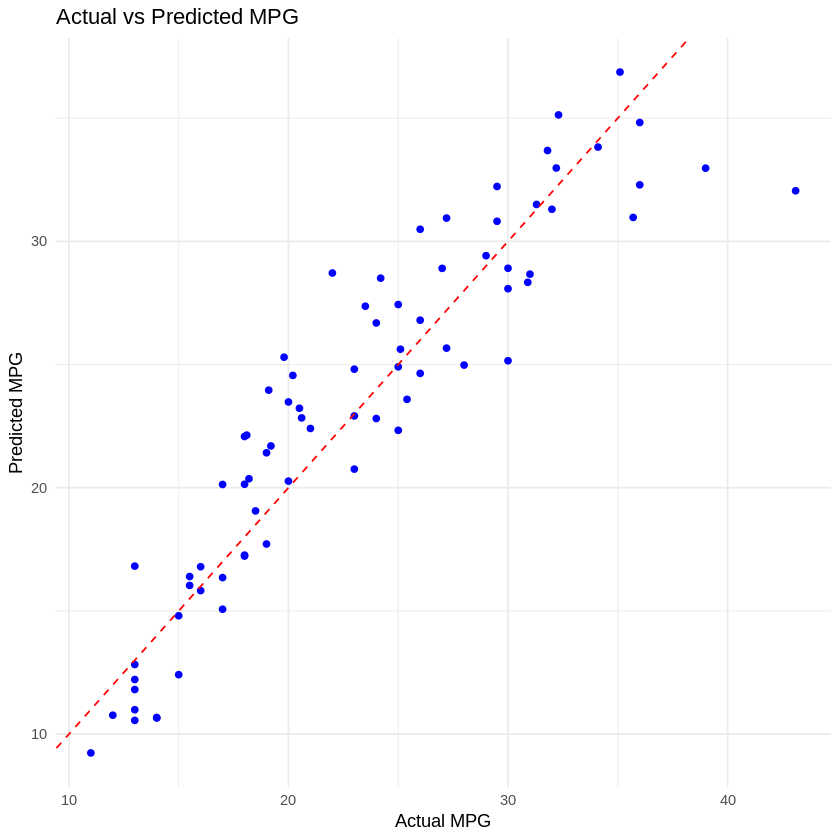

In [52]:
# Plot: Actual vs. Predicted MPG
results_df <- data.frame(
  Actual = test_data$mpg,
  Predicted = predictions
)

ggplot(results_df, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue") +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(
    title = "Actual vs Predicted MPG",
    x = "Actual MPG",
    y = "Predicted MPG"
  ) +
  theme_minimal()

P-value for weight: 2.209032e-16 
The predictor 'weight' is statistically significant (reject H0).

`geom_smooth()` using formula = 'y ~ x'


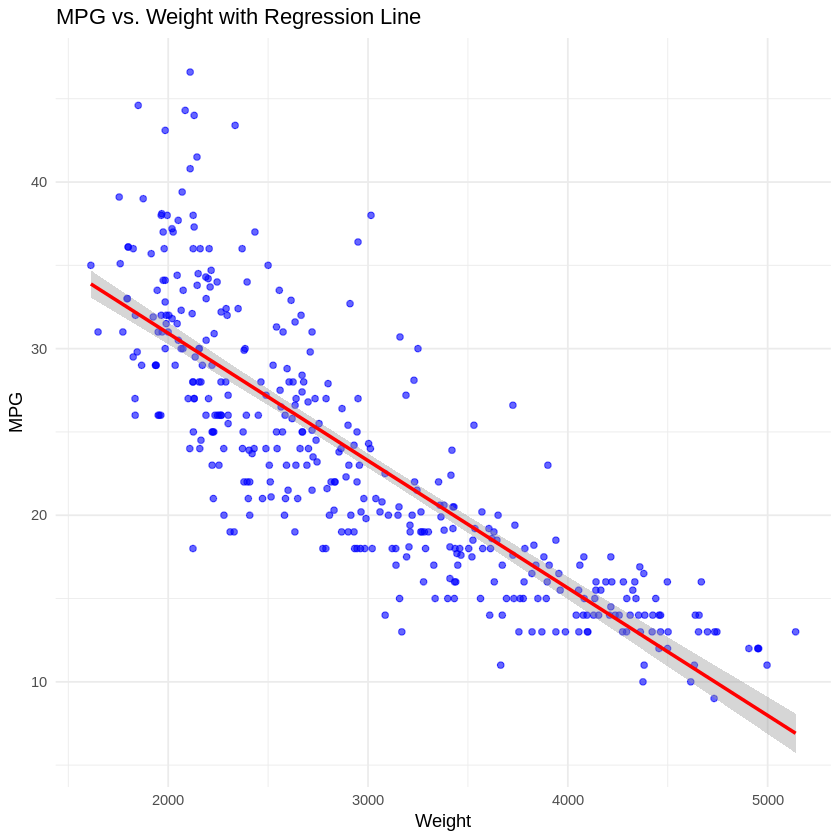

In [53]:
# Extract and print the p-value of weight
p_value <- summary(model)$coefficients["weight", "Pr(>|t|)"]
cat("P-value for weight:", p_value, "\n")

# Hypothesis test interpretation
if (p_value < 0.05) {
  cat("The predictor 'weight' is statistically significant (reject H0).")
} else {
  cat("The predictor 'weight' is not statistically significant (fail to reject H0).")
}

# Visualization: Scatter plot with regression line
ggplot(auto_mpg, aes(x = weight, y = mpg)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_smooth(method = "lm", color = "red", se = TRUE) +
  labs(title = "MPG vs. Weight with Regression Line", x = "Weight", y = "MPG") +
  theme_minimal()